# 外れ値・スケーリングを考慮した重回帰分析

# データの読み込み

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# csvファイルの読み込み
df = pd.read_csv('housing.csv')
print(df.head(3))


        x1    x2    x3  x4     x5     x6    x7      x8  x9  x10   x11     x12  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296  15.3  396.90   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242  17.8  396.90   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242  17.8  392.83   

    x13     y  
0  4.98  24.0  
1  9.14  21.6  
2  4.03  34.7  


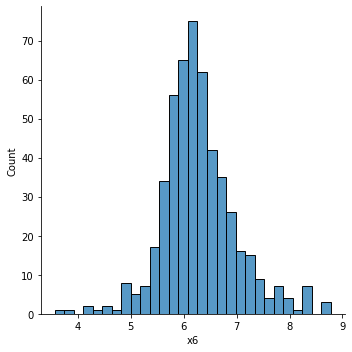

In [7]:
# 分布の確認
import seaborn as sns 
sns.displot(df['x6'])

In [9]:
col = 'x6'
mean = df.mean() #　平均の計算
mean[col] # x６のみの平均を出せる

6.284634387351779

In [12]:
# 標準偏差(standard deviation)
sigma = df.std()
sigma[col]

0.7026171434153233

In [15]:
low = mean[col] - 3 * sigma[col]
high = mean[col] + 3 * sigma[col]

print(low)
print(high)

4.176782957105809
8.392485817597748


In [22]:
# 条件を絞ってdfを表示
df2 = df[ (df[col] > low) & (df[col] < high)]
print(len(df))
print(len(df2))

506
498


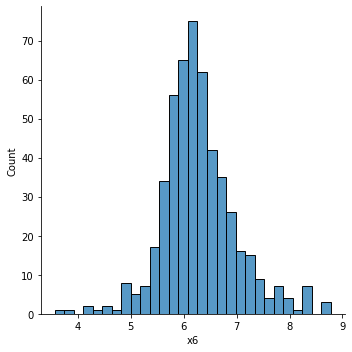

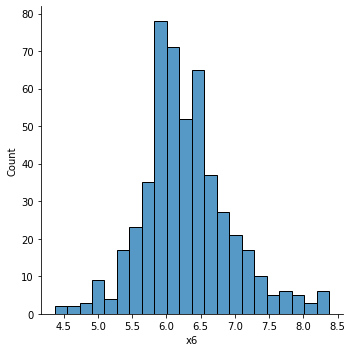

In [24]:
# 分布の確認
sns.displot(df['x6']) # オリジナルデータ
sns.displot(df2['x6'])

In [25]:
cols = df.columns
print(cols)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')


In [31]:
# csvファイルの読み込み
df = pd.read_csv('housing.csv')

_df = df

for col in cols:
    # 3σ法の上下限値を設定
    low  = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]


    # 条件での絞り込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

print(_df)

          x1    x2     x3  x4     x5     x6    x7      x8  x9  x10   x11  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..  ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273  21.0   

        x12   x13     y  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.

In [33]:
# オリジナル
print(len(df))

# ３σ法
print(len(_df))

506
415


サンプルが減る場合の対処法
- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析等を使って、潜在変数に変換した後に３σ法を適応　⇦　行動

# モデル構築

# 入力変数と出力変数に分割

In [34]:
# df.iloc[行. 列]]
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

In [39]:
# 訓練データと検証データに分割

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 重回帰分析

In [42]:
from sklearn.linear_model import LinearRegression
# モデルを宣言
model = LinearRegression()

# モデルの学習
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# 検証　⇦　訓練データ
model.score(X_train, y_train)

0.7972109224535133

In [44]:
# 検証　⇦　検証データ
model.score(X_test,y_test)

0.6253776004329594

## 検証データのスコアが下がってしまった
## 過去のデータの学習を頑張っている

## 過学習(オーバーフィッティング)

# スケーリングとパラメータの確認

In [57]:
from sklearn.preprocessing import StandardScaler

# scalerの宣言
scaler = StandardScaler()

# scalerの学習　⇦　平均と標準偏差を計算
# Testデータはテストの時にしか使用しない。　スケーリングやモデルの学習には一歳使用しない
scaler.fit(X_train)

StandardScaler()

In [58]:
# Scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [59]:
# モデルの宣言
model = LinearRegression()

In [60]:
# モデルの学習
# yが一つの場合はスケーリングする必要がない
model.fit(X_train2,y_train)

LinearRegression()

In [62]:
# 検証　⇦　訓練データ
model.score(X_train2, y_train)

0.7972109224535133

In [63]:
# 検証　⇦　検証データ
model.score(X_test2, y_test)

0.6253776004329598

# 重みの確認

In [68]:
print(model.coef_)
np.set_printoptions(precision = 3, suppress=True)

[-0.195  0.212  0.508  0.    -1.213  3.92  -0.37  -1.857  1.166 -1.529
 -1.873  0.244 -2.761]


/Users/naoaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

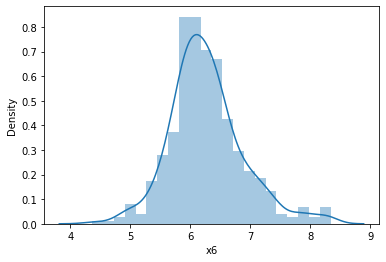

In [69]:
sns.distplot(_df['x6'])

/Users/naoaki/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x13', ylabel='Density'>

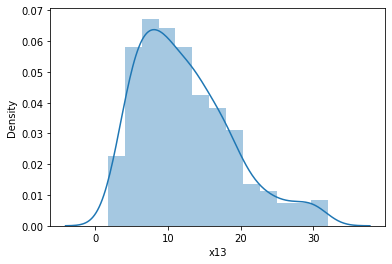

In [70]:
sns.distplot(_df['x13'])